In [160]:
import pandas as pd
from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer, set_seed
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt
import os

In [161]:
#### LOAD DATA

os.environ['PYTHONHASHSEED']= "123"
# set seed to produce reproducible results
set_seed(123)
device = torch.device("mps")


In [162]:
#### Set paths
WORKING_DIR = os.getcwd()
DATA_DIR = "data"
MODEL_DIR = os.path.join(WORKING_DIR, "models")
full_path = os.path.join(WORKING_DIR, DATA_DIR)

In [163]:
#### Load label mappings (comment out the version which is needed)

# labels_to_hs_ids = {'offensive': 0, 'other': 1}
# ids_to_hs_labels = {0: 'offensive', 1: 'other'}
labels_to_hs_ids = {'abuse': 0, 'explicit': 1, 'implicit': 2, 'insult': 3, 'other': 4, 'profanity': 5}
ids_to_hs_labels = {0: 'abuse', 1: 'explicit', 2: 'implicit', 3: 'insult', 4: 'other', 5: 'profanity'}

In [164]:
#### Load test data (comment out the version which is needed)

# test = pd.read_csv(os.path.join(full_path,"binary_test_nofeat_dataset.csv"))
# test = pd.read_csv(os.path.join(full_path,"binary_test_v1_dataset.csv"))
# test = pd.read_csv(os.path.join(full_path,"binary_test_v2_dataset.csv"))
# test = pd.read_csv(os.path.join(full_path,"multi_test_nofeat_dataset.csv"))
# test = pd.read_csv(os.path.join(full_path,"multi_test_v1_dataset.csv"))
test = pd.read_csv(os.path.join(full_path,"multi_test_v2_dataset.csv"))

In [165]:
#### Load model which needs to be tested (comment out the one which is needed)

# model = AutoModelForSequenceClassification.from_pretrained(os.path.join(MODEL_DIR, "model_cbn/checkpoint-540/"), local_files_only=True)
# model = AutoModelForSequenceClassification.from_pretrained(os.path.join(MODEL_DIR, "model_cbv1/checkpoint-540/"), local_files_only=True)
# model = AutoModelForSequenceClassification.from_pretrained(os.path.join(MODEL_DIR, "model_cbv2/checkpoint-300/"), local_files_only=True)
# model = AutoModelForSequenceClassification.from_pretrained(os.path.join(MODEL_DIR, "model_cmn/checkpoint-420/"), local_files_only=True)
# model = AutoModelForSequenceClassification.from_pretrained(os.path.join(MODEL_DIR, "model_cmv1/checkpoint-540/"), local_files_only=True)
# model = AutoModelForSequenceClassification.from_pretrained(os.path.join(MODEL_DIR, "model_cmv2/checkpoint-360/"), local_files_only=True)
# model = AutoModelForSequenceClassification.from_pretrained(os.path.join(MODEL_DIR, "model_ubn/checkpoint-420/"), local_files_only=True)
# model = AutoModelForSequenceClassification.from_pretrained(os.path.join(MODEL_DIR, "model_ubv1/checkpoint-360/"), local_files_only=True)
# model = AutoModelForSequenceClassification.from_pretrained(os.path.join(MODEL_DIR, "model_ubv2/checkpoint-300/"), local_files_only=True)
# model = AutoModelForSequenceClassification.from_pretrained(os.path.join(MODEL_DIR, "model_umn/checkpoint-540/"), local_files_only=True)
# model = AutoModelForSequenceClassification.from_pretrained(os.path.join(MODEL_DIR, "model_umv1/checkpoint-540/"), local_files_only=True)
model = AutoModelForSequenceClassification.from_pretrained(os.path.join(MODEL_DIR, "model_umv2/checkpoint-540/"), local_files_only=True)


In [166]:
#### Load corresponding tokenizer which is needed (comment out the one which is needed)

tokenizer = AutoTokenizer.from_pretrained("dbmdz/bert-base-german-uncased")
# tokenizer = AutoTokenizer.from_pretrained("dbmdz/bert-base-german-uncased")

In [167]:
#### Load 

predictions = []
gold_labels = [ids_to_hs_labels[i] for i in test["labels"]]
for text in test["texts"]:
    inputs = tokenizer(text, return_tensors="pt")
    with torch.no_grad():
        logits = model(**inputs).logits
    predicted_class_id = logits.argmax().item()
    predicted_label = model.config.id2label[predicted_class_id]
    predictions.append(predicted_label)

In [168]:
cm = confusion_matrix(gold_labels, predictions)
print(len(gold_labels))
print(gold_labels)
print(len(predictions))
print(predictions)

120
['abuse', 'explicit', 'implicit', 'other', 'explicit', 'abuse', 'explicit', 'abuse', 'profanity', 'insult', 'abuse', 'profanity', 'explicit', 'explicit', 'other', 'explicit', 'insult', 'profanity', 'insult', 'explicit', 'abuse', 'abuse', 'other', 'abuse', 'profanity', 'insult', 'implicit', 'insult', 'profanity', 'insult', 'profanity', 'explicit', 'implicit', 'other', 'implicit', 'explicit', 'insult', 'explicit', 'explicit', 'implicit', 'other', 'other', 'insult', 'abuse', 'insult', 'insult', 'insult', 'implicit', 'abuse', 'implicit', 'explicit', 'profanity', 'insult', 'implicit', 'abuse', 'insult', 'abuse', 'abuse', 'implicit', 'other', 'abuse', 'profanity', 'abuse', 'profanity', 'other', 'other', 'abuse', 'other', 'other', 'other', 'explicit', 'insult', 'profanity', 'insult', 'other', 'profanity', 'implicit', 'other', 'insult', 'insult', 'profanity', 'abuse', 'implicit', 'implicit', 'abuse', 'implicit', 'other', 'abuse', 'implicit', 'explicit', 'explicit', 'explicit', 'implicit', 

In [169]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels_to_hs_ids.keys())

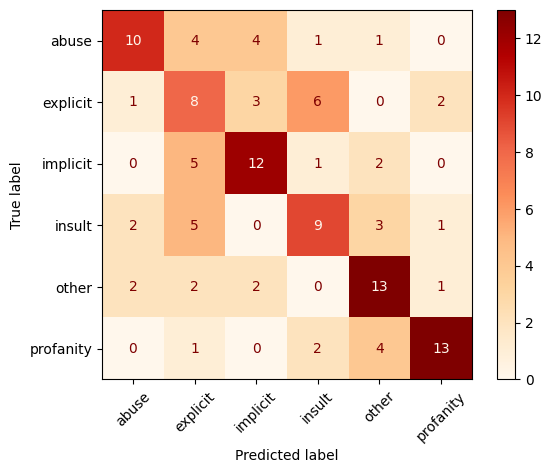

In [170]:
disp.plot(cmap = "OrRd", xticks_rotation=45)
plt.show()